In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("../datasets/ames.csv")

In [3]:
df

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating,Heating.QC,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Gr.Liv.Area,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Fireplace.Qu,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,GasA,TA,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120,0,0,0,0,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,GasA,TA,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1983.0,Unf,2.0,484.0,TA,TA,Y,164,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0

In [4]:
df.isna().sum(axis=0).sort_values(ascending=False).head(30)/len(df)

Pool.QC           0.995563
Misc.Feature      0.963823
Alley             0.932423
Fence             0.804778
Fireplace.Qu      0.485324
Lot.Frontage      0.167235
Garage.Cond       0.054266
Garage.Finish     0.054266
Garage.Yr.Blt     0.054266
Garage.Qual       0.054266
Garage.Type       0.053584
Bsmt.Exposure     0.028328
BsmtFin.Type.2    0.027645
Bsmt.Qual         0.027304
Bsmt.Cond         0.027304
BsmtFin.Type.1    0.027304
Mas.Vnr.Area      0.007850
Mas.Vnr.Type      0.007850
Bsmt.Full.Bath    0.000683
Bsmt.Half.Bath    0.000683
BsmtFin.SF.1      0.000341
Garage.Cars       0.000341
Electrical        0.000341
Total.Bsmt.SF     0.000341
Bsmt.Unf.SF       0.000341
BsmtFin.SF.2      0.000341
Garage.Area       0.000341
Paved.Drive       0.000000
Full.Bath         0.000000
Half.Bath         0.000000
dtype: float64

In [5]:
df = df.drop(columns=["Order","Pool.QC","Alley","Misc.Feature"])

In [6]:
df.Fence

0         NaN
1       MnPrv
2         NaN
3         NaN
4       MnPrv
        ...  
2925    GdPrv
2926    MnPrv
2927    MnPrv
2928      NaN
2929      NaN
Name: Fence, Length: 2930, dtype: object

In [7]:
df.loc[:,"Fence"] = (~df.Fence.isna()+0).astype("object")

In [8]:
df.loc[df["Fireplace.Qu"].isna(),"Fireplace.Qu"] = "NoFirePlace"

In [9]:
df.isna().sum(axis=0).sort_values(ascending=False).head(30)/len(df)

Lot.Frontage      0.167235
Garage.Cond       0.054266
Garage.Yr.Blt     0.054266
Garage.Finish     0.054266
Garage.Qual       0.054266
Garage.Type       0.053584
Bsmt.Exposure     0.028328
BsmtFin.Type.2    0.027645
BsmtFin.Type.1    0.027304
Bsmt.Cond         0.027304
Bsmt.Qual         0.027304
Mas.Vnr.Area      0.007850
Mas.Vnr.Type      0.007850
Bsmt.Full.Bath    0.000683
Bsmt.Half.Bath    0.000683
Garage.Area       0.000341
Garage.Cars       0.000341
Electrical        0.000341
Total.Bsmt.SF     0.000341
Bsmt.Unf.SF       0.000341
BsmtFin.SF.2      0.000341
BsmtFin.SF.1      0.000341
Paved.Drive       0.000000
Yr.Sold           0.000000
Full.Bath         0.000000
Half.Bath         0.000000
Bedroom.AbvGr     0.000000
Kitchen.AbvGr     0.000000
Kitchen.Qual      0.000000
Sale.Condition    0.000000
dtype: float64

In [10]:
df.loc[df["Lot.Frontage"].isna(),"Lot.Frontage"] = 0

In [11]:
df.isna().sum(axis=0).sort_values(ascending=False).head(30)/len(df)

Garage.Yr.Blt     0.054266
Garage.Finish     0.054266
Garage.Qual       0.054266
Garage.Cond       0.054266
Garage.Type       0.053584
Bsmt.Exposure     0.028328
BsmtFin.Type.2    0.027645
BsmtFin.Type.1    0.027304
Bsmt.Qual         0.027304
Bsmt.Cond         0.027304
Mas.Vnr.Area      0.007850
Mas.Vnr.Type      0.007850
Bsmt.Full.Bath    0.000683
Bsmt.Half.Bath    0.000683
BsmtFin.SF.1      0.000341
BsmtFin.SF.2      0.000341
Bsmt.Unf.SF       0.000341
Garage.Area       0.000341
Garage.Cars       0.000341
Total.Bsmt.SF     0.000341
Electrical        0.000341
TotRms.AbvGrd     0.000000
Kitchen.AbvGr     0.000000
Bedroom.AbvGr     0.000000
Half.Bath         0.000000
Full.Bath         0.000000
Kitchen.Qual      0.000000
PID               0.000000
Functional        0.000000
Pool.Area         0.000000
dtype: float64

In [12]:
df = df.dropna()

In [49]:
df.isna().sum(axis=0).sort_values(ascending=False).head(30)/len(df)

PID                0.0
Half.Bath          0.0
Fireplace.Qu       0.0
Fireplaces         0.0
Functional         0.0
TotRms.AbvGrd      0.0
Kitchen.Qual       0.0
Kitchen.AbvGr      0.0
Bedroom.AbvGr      0.0
Full.Bath          0.0
Garage.Yr.Blt      0.0
Bsmt.Half.Bath     0.0
Bsmt.Full.Bath     0.0
Gr.Liv.Area        0.0
Low.Qual.Fin.SF    0.0
X2nd.Flr.SF        0.0
X1st.Flr.SF        0.0
Electrical         0.0
Garage.Type        0.0
Garage.Finish      0.0
MS.SubClass        0.0
Screen.Porch       0.0
Sale.Condition     0.0
Sale.Type          0.0
Yr.Sold            0.0
Mo.Sold            0.0
Misc.Val           0.0
Fence              0.0
Pool.Area          0.0
X3Ssn.Porch        0.0
dtype: float64

In [50]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X=X, y=y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [51]:
X = df.copy()
y = X.pop("SalePrice")

In [52]:
X.shape

(2678, 77)

In [53]:
y.shape

(2678,)

In [54]:
# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [55]:
scores = make_mi_scores(X,y)

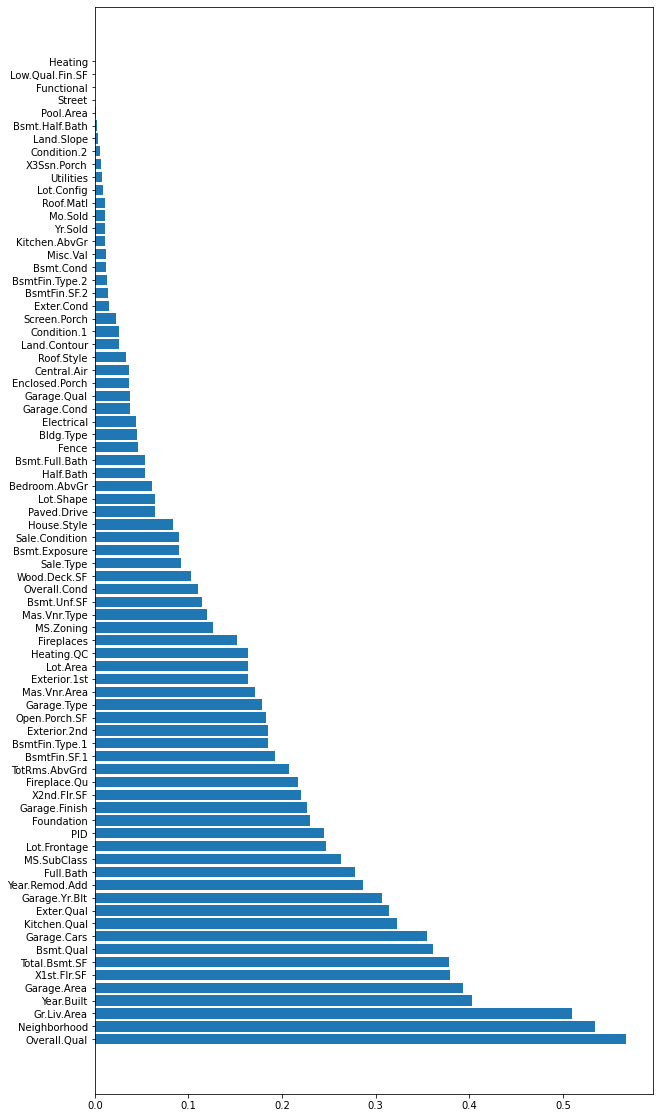

In [56]:
plt.figure(figsize=(10,20))
plt.barh(y=scores.index,width=scores)
plt.show()

In [125]:
significant_columns = scores[scores>0.1].index.tolist() +["SalePrice"]

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
df_selected = df[significant_columns].copy()

In [128]:
df_train, df_test = train_test_split(df_selected,test_size=0.15)

In [129]:
len(df_train)

2276

In [130]:
len(df_test)

402

In [131]:
X_train = df_train.copy()
y_train = X_train.pop("SalePrice")

In [132]:
X_test = df_test.copy()
y_test = X_test.pop("SalePrice")

In [133]:
corr_list = sorted(df.corr().to_dict()["SalePrice"].items(), key=lambda x: x[1], reverse=True)

In [134]:
corr_list

[('SalePrice', 1.0),
 ('Overall.Qual', 0.793248740163706),
 ('Gr.Liv.Area', 0.7158672472870127),
 ('Garage.Cars', 0.6524480156549262),
 ('Garage.Area', 0.6334666383041655),
 ('X1st.Flr.SF', 0.6304242377307444),
 ('Total.Bsmt.SF', 0.630305199392461),
 ('Full.Bath', 0.5558605712431229),
 ('Year.Built', 0.5457239565811318),
 ('Garage.Yr.Blt', 0.5268322200153862),
 ('Year.Remod.Add', 0.525889451616424),
 ('TotRms.AbvGrd', 0.523362862433803),
 ('Mas.Vnr.Area', 0.4996516876141701),
 ('Fireplaces', 0.45251651327869846),
 ('BsmtFin.SF.1', 0.41292478321170867),
 ('Open.Porch.SF', 0.3174614861160332),
 ('Wood.Deck.SF', 0.30948524227120644),
 ('Half.Bath', 0.26908549631095824),
 ('X2nd.Flr.SF', 0.2650377685209271),
 ('Bsmt.Full.Bath', 0.2630454039182293),
 ('Lot.Area', 0.26184236247538606),
 ('Lot.Frontage', 0.21027061186472903),
 ('Bsmt.Unf.SF', 0.16240752352460416),
 ('Bedroom.AbvGr', 0.14944111726852344),
 ('Screen.Porch', 0.1052321615291957),
 ('Pool.Area', 0.0744505954179772),
 ('Mo.Sold', 0

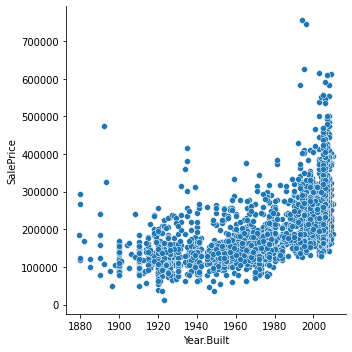

In [135]:
sns.relplot(data = df, x = "Year.Built",y ="SalePrice")

In [139]:
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer

# a function for getting all categorical_columns
def get_categorical_columns(df):
    categorical_columns_selector = selector(dtype_include=object)
    categorical_columns = categorical_columns_selector(df)
    return categorical_columns
def get_numerical_columns(df):
    numerical_columns_selector = selector(dtype_exclude=object)
    numerical_columns = numerical_columns_selector(df)
    return numerical_columns

In [140]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# a function for Transformation the data
def my_transformation(df):
    df = df.copy()
    
    numerical_columns = get_numerical_columns(df)
    nominal_columns = get_categorical_columns(df)

    
    numerical_pipeline = Pipeline([('scaler', StandardScaler())])
    nominal_pipeline = Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore'))])
   

    preprocessor = ColumnTransformer([
        ('numerical_transformer', numerical_pipeline, numerical_columns),
        ('nominal_transformer', nominal_pipeline, nominal_columns),
    ])
    
    preprocessor.fit(df)
    
    return preprocessor

In [147]:
preprocessor= my_transformation(X_train)
X_train_prepared = preprocessor.transform(X_train)
X_train_prepared.shape

(2276, 137)

In [148]:
X_test_prepared = preprocessor.transform(X_test)
X_test_prepared.shape

(402, 137)

In [144]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [145]:
random_forrest = RandomForestRegressor()
adaboost = AdaBoostRegressor()
decision_tree = DecisionTreeRegressor()
linear_regression = LinearRegression()

In [149]:
random_forrest.fit(X=X_train_prepared,y=y_train)

RandomForestRegressor()

In [153]:
adaboost.fit(X=X_train_prepared,y=y_train)

AdaBoostRegressor()

In [155]:
decision_tree.fit(X=X_train_prepared,y=y_train)

DecisionTreeRegressor()

In [156]:
linear_regression.fit(X=X_train_prepared,y=y_train)

LinearRegression()

In [165]:
y_test_pred_random_forrest = random_forrest.predict(X_test_prepared)

In [157]:
y_test_pred_adaboost = adaboost.predict(X_test_prepared)

In [159]:
y_test_pred_decision_tree= decision_tree.predict(X_test_prepared)

In [160]:
y_test_pred_linear_regression = linear_regression.predict(X_test_prepared)

In [161]:
from sklearn.metrics import mean_absolute_error, max_error, explained_variance_score

In [162]:
print("linear_regression")
mean_absolute_error(y_pred=y_test_pred_linear_regression,y_true=y_test)

linear_regression


16558.345380202554

In [163]:
print("decision_tree")
mean_absolute_error(y_pred=y_test_pred_decision_tree,y_true=y_test)

decision_tree


23204.278606965174

In [166]:
print("random_forrest")
mean_absolute_error(y_pred=y_test_pred_random_forrest,y_true=y_test)

random_forrest


15691.758058516938

In [167]:
print("adaboost")
mean_absolute_error(y_pred=y_test_pred_adaboost,y_true=y_test)

adaboost


22161.364441644368